# COVID-19 Detection on X-Ray Images

## 1. Importing the Training & Test Dataset

In [117]:
TRAIN_PATH = "/home/shubham/Desktop/COVID-19-master/Train"
VAL_PATH = "/home/shubham/Desktop/COVID-19-master/Val"



In [118]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

## 2. Buiding the CNN Architecture

In [119]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [120]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 110, 110, 64)      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                

## 3. Data Augmentation, Normalizing Data & Training the Model

In [121]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [122]:
train_generator = train_datagen.flow_from_directory(
    '/home/shubham/Desktop/COVID-19-master/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [123]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [124]:
validation_generator = test_dataset.flow_from_directory(
    '/home/shubham/Desktop/COVID-19-master/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [125]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=7,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

/tmp/ipykernel_8192/3418722423.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
7/7 [==============================] - 27s 4s/step - loss: 0.9894 - accuracy: 0.5714 - val_loss: 0.6891 - val_accuracy: 0.8500
Epoch 2/10
7/7 [==============================] - 26s 4s/step - loss: 0.6857 - accuracy: 0.5446 - val_loss: 0.6746 - val_accuracy: 0.9167
Epoch 3/10
7/7 [==============================] - 26s 4s/step - loss: 0.6002 - accuracy: 0.7009 - val_loss: 0.5292 - val_accuracy: 0.8833
Epoch 4/10
7/7 [==============================] - 26s 4s/step - loss: 0.4481 - accuracy: 0.7902 - val_loss: 0.3644 - val_accuracy: 0.8667
Epoch 5/10
7/7 [==============================] - 26s 4s/step - loss: 0.3113 - accuracy: 0.8705 - val_loss: 0.1947 - val_accuracy: 0.9333
Epoch 6/10
7/7 [==============================] - 26s 4s/step - loss: 0.2403 - accuracy: 0.9018 - val_loss: 0.0894 - val_accuracy: 0.9833
Epoch 7/10
7/7 [==============================] - 26s 4s/step - loss: 0.2867 - accuracy: 0.9107 - val_loss: 0.3039 - val_accuracy: 0.9833
Epoch 8/10
7/7 [==================

In [126]:
model.save("model_adv.h5")

/home/shubham/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [127]:
model.evaluate_generator(train_generator)

/tmp/ipykernel_8192/326654268.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator)


[0.11144048720598221, 0.9598214030265808]

In [128]:
model.evaluate_generator(validation_generator)

/tmp/ipykernel_8192/3378472596.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[0.07105134427547455, 0.9666666388511658]

## 4. Model Evaluation

In [129]:
model = load_model('model_adv.h5')

In [130]:
import os

In [131]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [132]:
y_actual = []
y_test = []

In [133]:
p = (model.predict(img) > 0.5).astype("int32")
from tensorflow.keras.preprocessing import image
import numpy as np
import os

y_test = []
y_actual = []

# Assuming the model is already loaded as `model`
# Processing Normal images
for i in os.listdir("./Val/Normal/"):
    img = image.load_img("./Val/Normal/" + i, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = (model.predict(img) > 0.5).astype("int32")  # For binary classification
    y_test.append(p[0, 0])
    y_actual.append(1)

# Processing Covid images
for i in os.listdir("./Val/Covid/"):
    img = image.load_img("./Val/Covid/" + i, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = (model.predict(img) > 0.5).astype("int32")  # For binary classification
    y_test.append(p[0, 0])
    y_actual.append(0)

# Converting lists to numpy arrays
y_actual = np.array(y_actual)
y_test = np.array(y_test)



1/1 [==============================] - 0s 23ms/step


In [134]:
# Now you can use y_actual and y_test for further evaluation, such as creating a confusion matrix.
print(y_test)
print(y_actual)

[1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### 4.1 Confusion Matrix

In [135]:
from sklearn.metrics import confusion_matrix

In [136]:
cm = confusion_matrix(y_actual, y_test)

<Axes: >

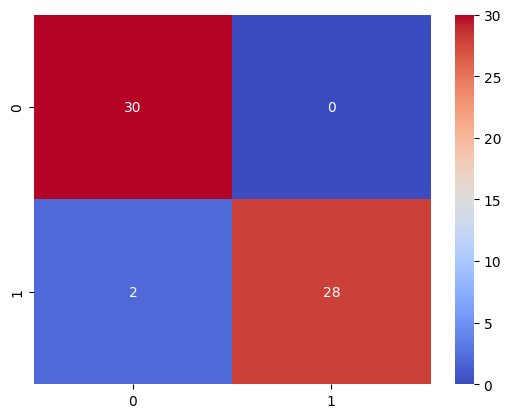

In [145]:
import seaborn as sns
sns.heatmap(cm, cmap='coolwarm', annot=True)

### 4.2 Plotting Training & Validation Loss

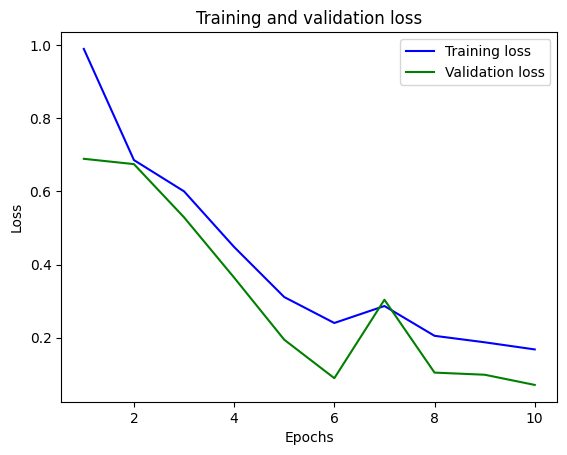

In [146]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='blue', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 4.3 Plotting Training & Validation Accuracy

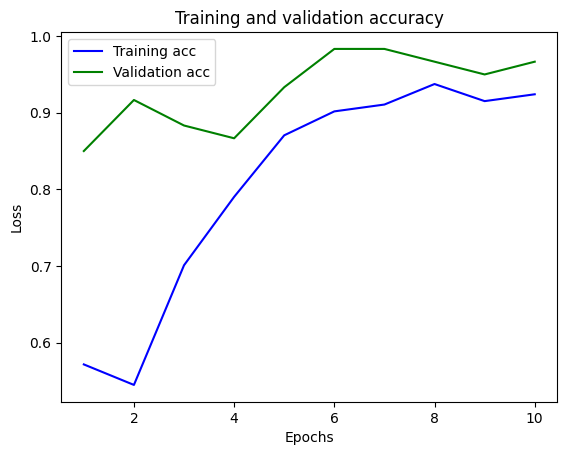

In [147]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(epochs, acc, color='blue', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 5. Some Comparative Results of Radiologist vs CNN Model on Validation set

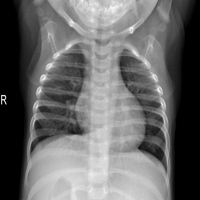

1/1 [==============================] - 0s 26ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


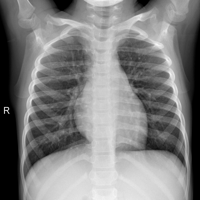

1/1 [==============================] - 0s 25ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


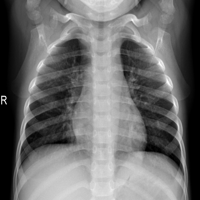

1/1 [==============================] - 0s 25ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


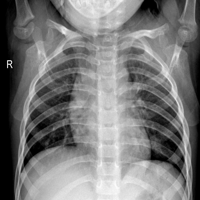

1/1 [==============================] - 0s 24ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


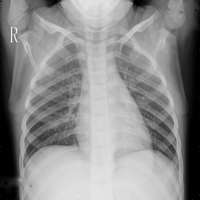

1/1 [==============================] - 0s 24ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


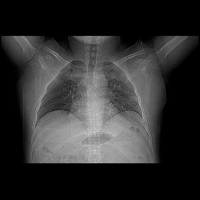

1/1 [==============================] - 0s 23ms/step
Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


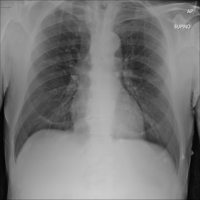

1/1 [==============================] - 0s 25ms/step
Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


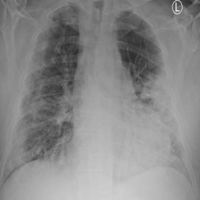

1/1 [==============================] - 0s 23ms/step
Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


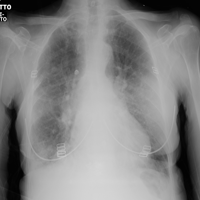

1/1 [==============================] - 0s 26ms/step
Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


ValueError: Could not save to JPEG for display

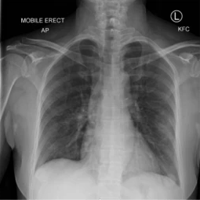

1/1 [==============================] - 0s 25ms/step
Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


In [140]:
class color:
   GREEN = '\033[92m'
   RED = '\033[91m'
   
from PIL import Image
j = 0
for i in os.listdir("./Val/Normal/"):
  j = j+1
  pil_img = Image.open('./Val/Normal/'+i)
  im = pil_img
  size = (200,200) #image size
  
  #resize image
  out = im.resize(size)
  display(out)
  img = image.load_img("./Val/Normal/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  print(color.GREEN + 'Radiologist: COVID-19 -ve' + color.GREEN)

  if p==0:
    print(color.RED + 'CNN Model: COVID-19 +ve' + color.RED)
  else:
    print("CNN Model: COVID-19 -ve")
  if (j==5):
    break

from PIL import Image
j = 0
for i in os.listdir("./Val/Covid/"):
  j = j+1
  pil_img = Image.open('./Val/Covid/'+i)
  im = pil_img
  size = (200,200) #image size
  
  #resize image
  out = im.resize(size)
  display(out)
  img = image.load_img("./Val/Covid/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  print(color.RED + 'Radiologist: COVID-19 +ve' + color.RED)
  if p==0:
    print("CNN Model: COVID-19 +ve")
  else:
    print(color.GREEN + 'Radiologist: COVID-19 -ve' + color.GREEN)
  if (j==5):
    break

*This Method has not been validated clinically and hence should not be used as it is in any clinical computer aided diagnosis system.*

